# **Banknote Authentication Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics




## **Importing Data**

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", header = None)

# Target Variable: class 0 is “genuine/authentic” and class 1 is “forgery/fake”
df = df.rename(columns={0: "Variance", 1: "Skewness", 2: "Kurtosis", 3: "Entropy", 4: "Target"})

X = df[["Variance", "Skewness", "Kurtosis", "Entropy"]]
y = df[["Target"]]
X = X.to_numpy()
y = y.to_numpy()

df

,Variance,Skewness,Kurtosis,Entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1




---



## **Logistic Regression**

In [ ]:
#add data exploration

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression(random_state=0).fit(X_train, y_train.ravel())
clf.predict(X_test[:2, :])
clf.predict_proba(X_test[:2, :])
print("Score:", clf.score(X_test, y_test))

confusion_matrix(y_test, clf.predict(X_test))
#add validation 

Score: 0.9878640776699029


array([[227,   5],
       [  0, 180]])

- True Negatives: 227 (correctly identified as real - successful)
- False Negatives: 0 (falsely identified as real - counterfeit money accepted)
- False Positives: 5 (falsely identified as fake - genuine money turned down)
- True Postivies: 180 (correctly identified as fake - successful)

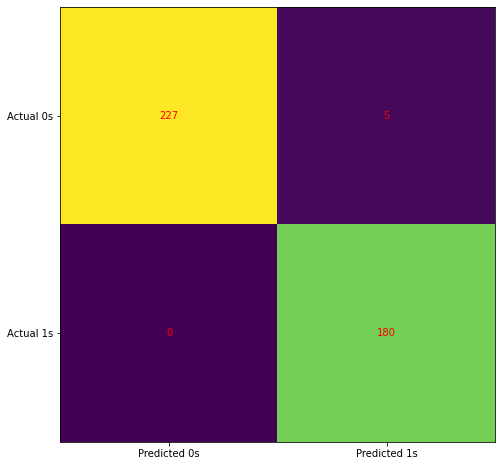

In [ ]:
cm = confusion_matrix(y_test, clf.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Attempt at Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rfclf=RandomForestClassifier(n_estimators=100)
rfclf.fit(X_train,y_train.ravel())

rf_y_pred=rfclf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test.ravel(), rf_y_pred.ravel()))

Accuracy: 0.9951456310679612


In [ ]:
c = ["Variance", "Skewness", "Kurtosis", "Entropy"]
feature_imp = pd.Series(rfclf.feature_importances_,index=c).sort_values(ascending=False)

No handles with labels found to put in legend.


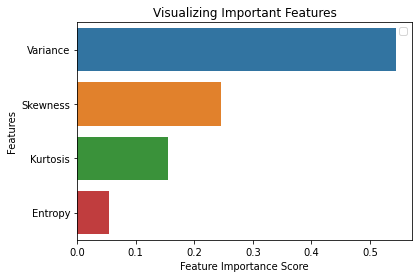

In [ ]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()